In [1]:
import pandas as pd
data=pd.read_csv("covid_data.csv").drop(columns=["Unnamed: 0","index"]).reset_index(drop=True)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=data.copy()

In [4]:
df

,id,created_at,original_text,clean_text,sentiment,lang,screen_name,location
0,1473080340134744072,Mon Dec 20 23:58:16 +0000 2021,RT @LoreleiKing: While they enjoyed a friends ...,RT LoreleiKing While enjoyed friends n family ...,"Sentiment(polarity=0.5, subjectivity=0.7)",en,alisonmcraig,NaN
1,1473080133502210049,Mon Dec 20 23:57:26 +0000 2021,RT @1drcole: Breaking News: @MSNBC @TheBeatWit...,RT 1drcole Breaking News MSNBC TheBeatWithAri ...,"Sentiment(polarity=0.0, subjectivity=0.0)",en,GeorgeAAlvarez1,"California, USA"
2,1473080132319408129,Mon Dec 20 23:57:26 +0000 2021,RT @MaritsaGeorgiou: #BREAKING Montana records...,RT MaritsaGeorgiou BREAKING Montana records fi...,"Sentiment(polarity=0.25, subjectivity=0.333333...",en,GailWaldby,MT
3,1473080130285105154,Mon Dec 20 23:57:26 +0000 2021,"RT @disclosetv: NEW - Trump: ""You’re playing r...",RT disclosetv NEW Trump `` You ’ playing right...,"Sentiment(polarity=0.21103896103896103, subjec...",en,mattsongs,"Las Vegas, Nevada"
4,1473080129408552963,Mon Dec 20 23:57:26 +0000 2021,#covid vaccine roll out in general practice - ...,covid vaccine roll general practice “ consent ...,"Sentiment(polarity=0.05000000000000002, subjec...",en,Prof_NickTalley,NaN
...,...,...,...,...,...,...,...,...
21414,1477027082383286278,Fri Dec 31 21:21:12 +0000 2021,RT @Ali_Aminian_MD: @JAMASurgery In patients w...,RT Ali_Aminian_MD JAMASurgery In patients obes...,"Sentiment(polarity=0.0, subjectivity=0.0)",en,JerryDangMD,"Edmonton, Alberta"
21415,1477027077866106881,Fri Dec 31 21:21:11 +0000 2021,RT @DrEricDing: “Mild” but hospitals overloade...,RT DrEricDing “ Mild ” hospitals overloaded “ ...,"Sentiment(polarity=0.3333333333333333, subject...",en,CmiloseMilose,Canton MI
21416,1477027077236957190,Fri Dec 31 21:21:11 +0000 2021,DC has the highest cases per 100k in the metro...,DC highest cases per 100k metro Atl Data GDPH ...,"Sentiment(polarity=0.1, subjectivity=1.0)",en,GANewsDville,"Douglasville, Georgia"
21417,1477027076704288774,Fri Dec 31 21:21:11 +0000 2021,#NewYork #NYC #NewYorkCity #USA - Global #COVI...,NewYork NYC NewYorkCity USA Global COVID19 Pan...,"Sentiment(polarity=0.06818181818181818, subjec...",en,realhumanrights,Washington DC


In [5]:
df["clean_text"]=df["clean_text"].str.replace(r'http\S+',"")

In [6]:
df["clean_text"]=df["clean_text"].str.replace('[^\w\s]'," ")


In [7]:
df["clean_text"]=df["clean_text"].str.replace('[0-9]+'," ")

In [8]:
df["clean_text"]=df["clean_text"].str.replace('\n'," ")

In [9]:
df["clean_text"]=df["clean_text"].str.replace('\r'," ")

In [10]:
df["clean_text"]=df["clean_text"].str.replace('RT'," ")

In [11]:
df["clean_text"]=df["clean_text"].str.replace('Pedia'," ")

In [12]:
df["clean_text"]=df["clean_text"].astype(str)

In [16]:
!pip install wordcloud

In [17]:
import wordcloud
from wordcloud import WordCloud

In [18]:
wordcloud = WordCloud(background_color="white").generate(' '.join(df["clean_text"]))

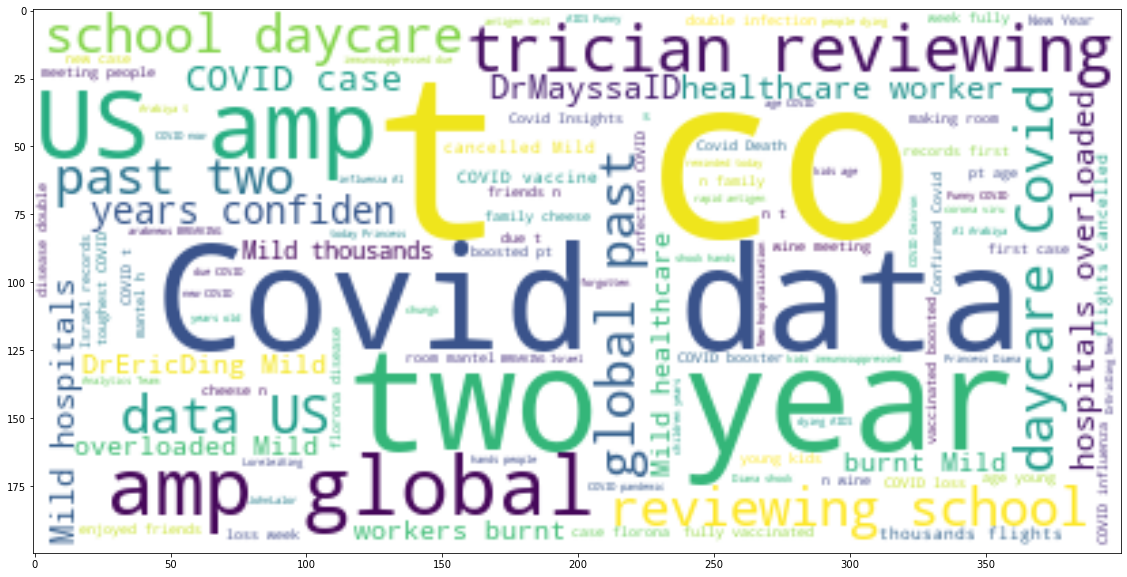

In [19]:
import matplotlib.pyplot as plt
plt.figure (figsize = (20,10)) 
plt.imshow(wordcloud, interpolation='bilinear');

In [20]:
df["clean_text"]=df["clean_text"].str.lower()

In [22]:
!pip install textblob

In [ ]:
import textblob
from textblob import TextBlob
df["clean_text"]=df["clean_text"].apply(lambda x: TextBlob(x).correct())

In [ ]:
df["clean_text"]=df["clean_text"].astype(str)

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df["clean_text"]=df["clean_text"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
 
import textblob
from textblob import TextBlob        
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
df["clean_text"]=df["clean_text"].apply(getPolarity)
sentiments=df["sentiment"]
sentiments=sentiments.tolist()
newsent=[]
def score(sent):
    for s in sent:
        if s<0:
            newsent.append(-1)
        if s>0:
            newsent.append(1)
        else:
            newsent.append(0)
    return newsent
newsentiments=score(sentiments)

In [ ]:

sentiments=pd.DataFrame(newsentiments,columns=["sentiments"])
df["sentiments"]=sentiments["sentiments"]
df=df.drop(columns=["sentiment"])

In [ ]:
df["sentiments"].value_counts().plot.bar()